# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import iqr
from scipy.stats import sem
from numpy.random import seed
import scipy.stats as sts
import seaborn as sns
medical = pd.read_csv('insurance2.csv')

In [7]:
medical.shape

(1338, 8)

In [8]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [9]:
mean = medical.charges.mean()
std= medical.charges.std()
mean, std

(13270.422265141257, 12110.011236693994)

In [10]:
IQR = iqr(medical.charges)
upper_bound = IQR*3
IQR, upper_bound
# https://statisticsbyjim.com/basics/outliers/

(11899.625365, 35698.876095)

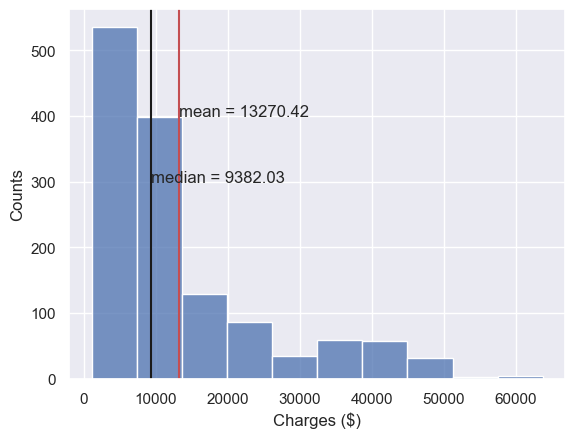

In [11]:
sns.set()
sns.histplot(medical.charges, bins=10)
plt.xlabel('Charges ($)')
plt.ylabel('Counts')
plt.axvline(medical.charges.mean(), color='r')
plt.annotate("mean = {:.2f}".format(medical.charges.mean()), xy=(medical.charges.mean(),400))
plt.axvline(medical.charges.median(), color='k')
plt.annotate("median = {:.2f}".format(medical.charges.median()), xy=(medical.charges.median(),300))
plt.show()

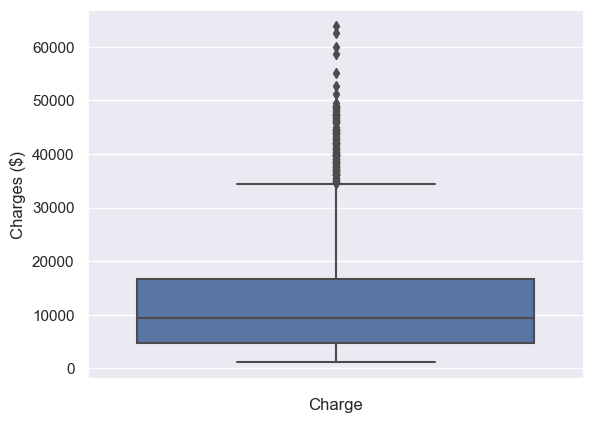

In [12]:
sns.boxplot(y='charges', data=medical)
plt.ylabel('Charges ($)')
plt.xlabel('Charge')
plt.show()

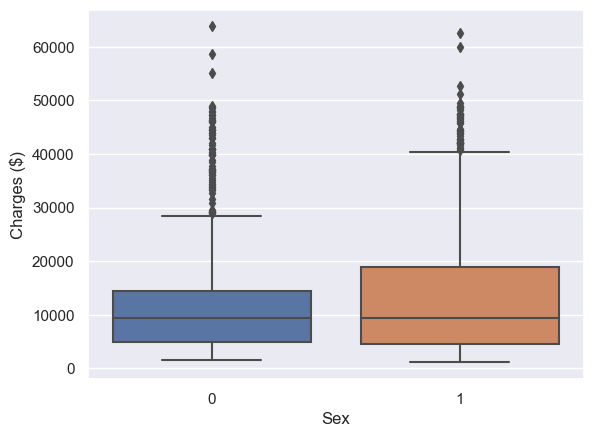

In [13]:
sns.boxplot(x='sex', y='charges', data=medical)
plt.ylabel('Charges ($)')
plt.xlabel('Sex')
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: Here is the question: has the hospital's revenue stream fallen below a key threshold?
The current sample shows that it is right skewed and it is not following a normal distribution. Since the size of the sample is over 30, we can use these data to draw some conclusions about whether the revenue fallen below 12000. We use the t-statistics because the distribution of the sample is not normal.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A: This is a one-sided test as it needs to answer if the mean has dropped below 12000 or not. 

H0: The average revenue has fallen below 12000. mu0 < 12000

HA: The average revenue has not fallen below 12000. mu0 >= 12000


In [14]:
# We do a bootstrapping and create the sampling distribution of the sample mean
bootstrapped_sample = list()
for _ in range(len(medical.charges)):
    bootstrapped_sample.append(np.mean(np.random.choice(medical.charges, 50)))
medical['bootstrapped_sample'] =  bootstrapped_sample

In [15]:
medical['bootstrapped_sample'] 

0       11522.294849
1       12816.315622
2       15438.856592
3       16323.916559
4       10014.816077
            ...     
1333    12040.083474
1334    10878.881246
1335    13619.469164
1336    14839.642780
1337    11766.448714
Name: bootstrapped_sample, Length: 1338, dtype: float64

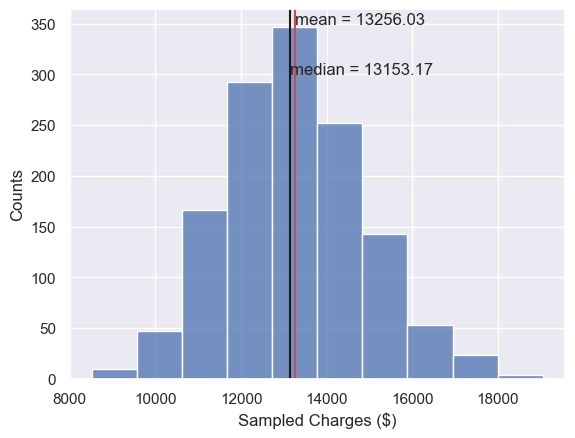

In [17]:
sns.set()
sns.histplot(medical.bootstrapped_sample, bins=10)
plt.xlabel('Sampled Charges ($)')
plt.ylabel('Counts')
plt.axvline(medical.bootstrapped_sample.mean(), color='r')
plt.annotate("mean = {:.2f}".format(medical.bootstrapped_sample.mean()), xy=(medical.bootstrapped_sample.mean(),350))
plt.axvline(medical.bootstrapped_sample.median(), color='k')
plt.annotate("median = {:.2f}".format(medical.bootstrapped_sample.median()), xy=(medical.bootstrapped_sample.median(),300))
plt.show()

This clearly shows a normal distribution confirming the Central Limit Theorem (CLT). Now we need to find the critical t-statistics for the 95 % confidence interval. 

In [19]:
t_critical = t.ppf(0.975, df=len(medical.bootstrapped_sample) - 1, loc=0, scale=1)
t_critical

1.961739888600845

In [28]:
# margin of error
margin_of_error = t_critical * sem(medical.charges)
margin_of_error

649.4682309486122

In [34]:
# Standard error of the mean
print(sem(medical.charges, ddof=1), medical.charges.std(ddof=1)/ np.sqrt(len(medical)))

331.0674543156824 331.06745431568226


In [35]:
ci_manual = (medical.charges.mean() - margin_of_error, medical.charges.mean() + margin_of_error)
ci_code = t.interval(0.95, df =  len(medical) - 1, loc = medical.charges.mean(), scale = medical.charges.sem(ddof=1))
print(ci_manual, ci_code)

(12620.954034192644, 13919.890496089869) (12620.954034192644, 13919.890496089869)


Since the sample mean is within the confidence interval of (12620.954034192644, 13919.890496089869), therefore the charges has not dropped below 12000, and thus the null hypothesis is rejected!

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A: The question to answer is: are patients with insurance really charged different amounts than those without?

#### H0: Null hypothesis: No difference in charge between two groups (patients with insurance and without insurance)
#### HA: Alternative hypothesis: There is a difference between the two.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A: The p-value is zerol, so we reject the null hypothesis and accept the alternate, which is that there is diffirence in the average charges the two groups pay. Also, the t-score calculated manually and found by the scipy.stats are similar.

In [36]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [37]:
# Subsetting the medical charges based on the 
medical_charges_no = medical['charges'][medical.insuranceclaim==0]
medical_charges_with = medical['charges'][medical.insuranceclaim==1]

In [41]:
medical_charges_no.shape

(555,)

In [40]:
medical_charges_with.shape

(783,)

In [50]:
# Resampling from the samples
seed(47)

medical_charges_no_sampled=[]
for _ in range(len(medical_charges_no)):
    medical_charges_no_sampled.append(np.mean(np.random.choice(medical_charges_no, size=50)))
    
medical_charges_with_sampled=[]
for _ in range(len(medical_charges_with)):
    medical_charges_with_sampled.append(np.mean(np.random.choice(medical_charges_with, size=50)))

In [51]:
# pool_std is a function to estimate standard deviation of the pooled sample.

def pool_std(df1, df2):
    n1, n2 = len(df1), len(df2)
    std1, std2 = np.std(df1, ddof=1), np.std(df2, ddof=1)
    sp = np.sqrt(((n1 - 1) * (std1**2) + (n2 - 1) * (std2**2)) / (n1 + n2 - 2))
    return sp

In [52]:
# t_stats is a function to estimate t-statistic

def t_stats(df1, df2):
    sp = pool_std(df1, df2)
    x0 = np.mean(df1)
    x1 = np.mean(df2)
    n0 = len(df1)
    n1 = len(df2)
    t = ((x0 - x1)/(sp*np.sqrt(1/n0 + 1/n1)))
    return t

In [53]:
pool_std(medical_charges_no_sampled, medical_charges_with_sampled)

1606.9798407574945

In [95]:
# Calculating t-value and p-value
t_value = t_stats(medical_charges_with_sampled, medical_charges_no_sampled)
p_value = t.sf(np.abs(t_value), len(medical_charges_no) + len(medical_charges_with) - 2) * 2
(t_value, p_value)

(83.84612181644869, 0.0)

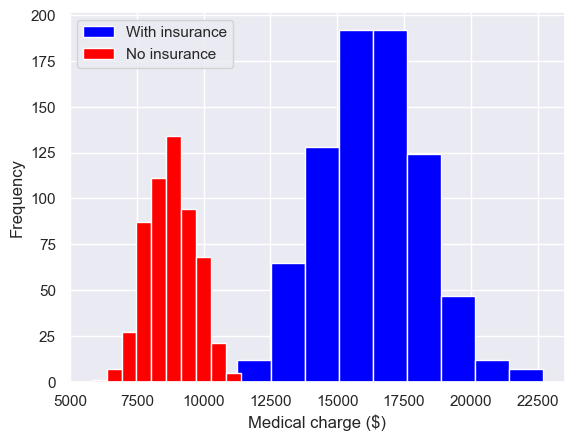

In [96]:
plt.hist(medical_charges_with_sampled, color = 'blue')
plt.hist(medical_charges_no_sampled, color = 'red')
plt.xlabel('Medical charge ($)')
plt.ylabel('Frequency')
plt.legend(['With insurance', 'No insurance'])

In [106]:
# Using permutation
# Resampling from the samples
seed(47)
medical_charges = pd.concat([medical_charges_no, medical_charges_with])
medical_charges_stat = []
for _ in range(len(medical_charges)):
    medical_charges_sampled = np.random.permutation(medical_charges)
    medical_charges_sampled_no = medical_charges_sampled[0:len(medical_charges_no)]
    medical_charges_sampled_with = medical_charges_sampled[0:len(medical_charges_with)]
    medical_charges_stat.append((np.mean(medical_charges_sampled_no), np.mean(medical_charges_sampled_with)))


In [107]:
medical_charges_stat_unzip = list(zip(*medical_charges_stat))
medical_charges_sampled_no_per = list(medical_charges_stat_unzip[0])
medical_charges_sampled_with_per = list(medical_charges_stat_unzip[1])

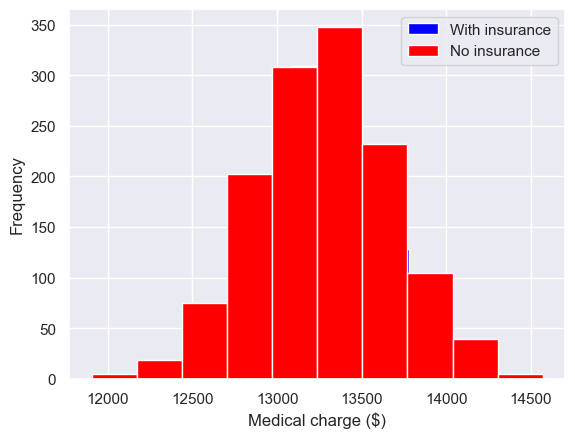

In [108]:
plt.hist(medical_charges_sampled_with_per, color = 'blue')
plt.hist(medical_charges_sampled_no_per, color = 'red')
plt.xlabel('Medical charge ($)')
plt.ylabel('Frequency')
plt.legend(['With insurance', 'No insurance'])

In [109]:
# Calculating t-value and p-value
t_value_per = t_stats(medical_charges_sampled_with_per, medical_charges_sampled_no_per)
p_value_per = t.sf(np.abs(t_value), len(medical_charges_sampled_with_per) + len(medical_charges_sampled_with_per) - 2) * 2
(t_value_per, p_value_per)

(0.18471245488416124, 0.0)

In [92]:
# Using scipy.ttest if working with current sample
sts.ttest_ind(medical_charges_with, medical_charges_no, axis=0, equal_var=True , alternative='two-sided')

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [94]:
# Using scipy.ttest if working with bootstrapped samples
sts.ttest_ind(medical_charges_with_sampled, medical_charges_no_sampled, axis=0, equal_var=True , alternative='two-sided')

Ttest_indResult(statistic=83.84612181644869, pvalue=0.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test